In [1]:
import numpy as np # linear algebra
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/coronavirus-genome-sequence/MN908947.fna
/kaggle/input/coronavirus-genome-sequence/A_new_coronavirus_associated_with_human_respirator.pdf
/kaggle/input/coronavirus-genome-sequence/MN908947.txt
/kaggle/input/covid19-genbank-file/sequence.gb.txt


The COVID-19 genome is the complete genetic material of the SARS-CoV-2 virus, which is responsible for the COVID-19 pandemic. It is an RNA genome consisting of approximately 30,000 nucleotides. The genome contains important information encoded in its sequence, including instructions for viral replication, protein synthesis, and interaction with host cells. Understanding the COVID-19 genome is crucial for developing diagnostic tests, vaccines, and treatments. Scientists have extensively studied the genome to identify various genetic markers, mutations, and potential targets for interventions. Analyzing the genome helps in tracking the spread of the virus, studying its evolutionary changes, and designing effective strategies to control the disease.

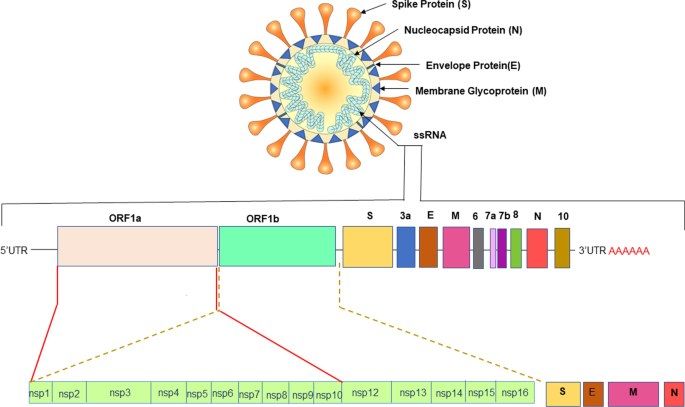

In this notebook I will primarily be dealing with the transcription, translation and prediction of genome/dna sequences during the covid-19 pandemic. 

importing the genome sequence for protein transcription and translation into RNA and proteins respectively

In [2]:
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
covid19 = SeqIO.read('/kaggle/input/coronavirus-genome-sequence/MN908947.fna', "fasta")

In [3]:
# Display the ID and description of the sequence
print("Sequence ID:", covid19.id)
print("Description:", covid19.description)

# Display the first few nucleotides of the sequence
print("First 100 nucleotides of the sequence:", covid19.seq[:100])

Sequence ID: MN908947.3
Description: MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
First 100 nucleotides of the sequence: ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC


In [4]:
# Display the ID, description, length, and a sample of the sequence
print("Sequence ID:", covid19.id)
print("Description:", covid19.description)
print("Sequence Length:", len(covid19.seq))
print("First 100 nucleotides of the sequence:", covid19.seq[:100])


Sequence ID: MN908947.3
Description: MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Sequence Length: 29903
First 100 nucleotides of the sequence: ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC


In [5]:
# Print the type of the dataset
print("Type of covid19 dataset:", type(covid19))

# Print the length (number of nucleotides) in the sequence
print("Size of covid19 sequence:", len(covid19.seq))


Type of covid19 dataset: <class 'Bio.SeqRecord.SeqRecord'>
Size of covid19 sequence: 29903


finding the total count of the covid19 genome sequence

In [6]:
sequence_count = len(covid19)
print("Total count of the sequence: ", sequence_count)

Total count of the sequence:  29903


to perform some basic operations on the DNA segment of the covid 19 genome, let us extract the first 50 characters of the sequence

In [7]:
    covid19_DNA=covid19.seq
    covid_DNA=covid19_DNA[:50]
    print(covid_DNA) #print the final DNA segment

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTC


The DNA sequence here primarily consists of 4 bases: Alanines, Glycines, Cysteines and Threonines. Using this basic sequence, certain operations can be performed

in the below code block we will be implementing the complement and reverse complement of the given DNA sequence

In [8]:
print(covid_DNA + " - Sequence")
print(covid_DNA.complement() + " - Complement")
print(covid_DNA.reverse_complement() + " - Reverse Complement")

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTC - Sequence
TAATTTCCAAATATGGAAGGGTCCATTGTTTGGTTGGTTGAAAGCTAGAG - Complement
GAGATCGAAAGTTGGTTGGTTTGTTACCTGGGAAGGTATAAACCTTTAAT - Reverse Complement


To understand the content of the COVID-19 better, lets count the percentage of A,G,C and T in the genome sequence

In [9]:
count_A = covid19_DNA.count('A')
count_G = covid19_DNA.count('G')
count_C = covid19_DNA.count('C')
count_T = covid19_DNA.count('T')

# Calculate the percentages
total_count = len(covid19_DNA)
percentage_A = (count_A / total_count) * 100
percentage_G = (count_G / total_count) * 100
percentage_C = (count_C / total_count) * 100
percentage_T = (count_T / total_count) * 100

# Print the percentages
print("Percentage of A: {:.2f}%".format(percentage_A))
print("Percentage of G: {:.2f}%".format(percentage_G))
print("Percentage of C: {:.2f}%".format(percentage_C))
print("Percentage of T: {:.2f}%".format(percentage_T))

Percentage of A: 29.94%
Percentage of G: 19.61%
Percentage of C: 18.37%
Percentage of T: 32.08%


plotting a bar plot for the total A,G,C,T count

In [10]:
nucleotides={'A':count_A,'G':count_G,'C':count_C,'T':count_T}
print(nucleotides)

{'A': 8954, 'G': 5863, 'C': 5492, 'T': 9594}


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


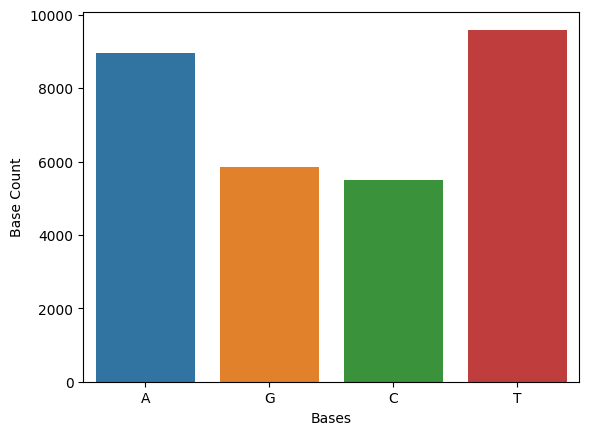

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the nucleotide counts
nucleotides = {'A': count_A, 'G': count_G, 'C': count_C, 'T': count_T}

# Create lists for x-axis labels and y-axis values
bases = list(nucleotides.keys())
base_counts = list(nucleotides.values())

# Create bar plot using Seaborn
sns.barplot(x=bases, y=base_counts)

# Set labels for x-axis and y-axis
plt.xlabel('Bases')
plt.ylabel('Base Count')

# Display the plot
plt.show()

Hence we have been able to find the counts of all the bases in the given genome sequence

The GC content of a genome sequence refers to the percentage of nucleotides that are either guanine (G) or cytosine (C) in relation to the total number of nucleotides in the sequence. It is a measure of the relative abundance of these nucleotides in the DNA molecule.

GC content is important because it can influence the stability and properties of the DNA molecule. The stability of DNA can have implications for various biological processes such as DNA replication, transcription, and protein binding. Additionally, differences in GC content can be associated with variations in gene expression, evolutionary patterns, and genome structure among different organisms.Now, finding the GC% using predefined modules in BioPython, we get:

In [12]:
from Bio.SeqUtils import GC
print("GC% is equal to: " +str(GC(covid19_DNA)))

GC% is equal to: 37.97277865097148


/opt/conda/lib/python3.10/site-packages/Bio/SeqUtils/__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


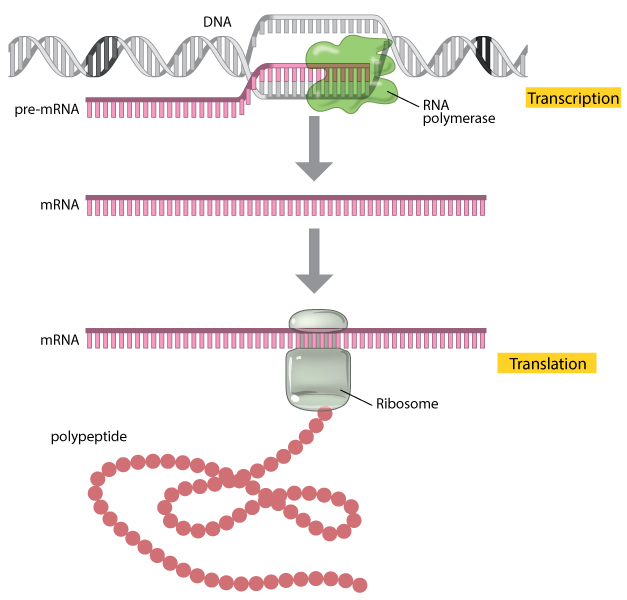

***TRANSCIPTION AND TRANSLATION***

During gene expression, the genetic information stored in a sequence of DNA is used to produce functional gene products, typically proteins. This process involves two main steps: transcription and translation.

Transcription is the process by which DNA is copied or transcribed into a messenger RNA (mRNA) molecule. The DNA sequence serves as a template for the synthesis of an mRNA molecule through a complementary base-pairing mechanism. The resulting mRNA molecule contains a copy of the genetic information from the DNA, but with the nucleotide thymine (T) replaced by uracil (U).

Translation is the subsequent step where the mRNA molecule is translated into a sequence of amino acids, which form a protein. The mRNA molecule contains codons, which are sequences of three nucleotides that specify particular amino acids. During translation, the ribosome reads the mRNA sequence and matches each codon with its corresponding amino acid, based on the genetic code. This process continues until a stop codon is encountered, indicating the end of protein synthesis.

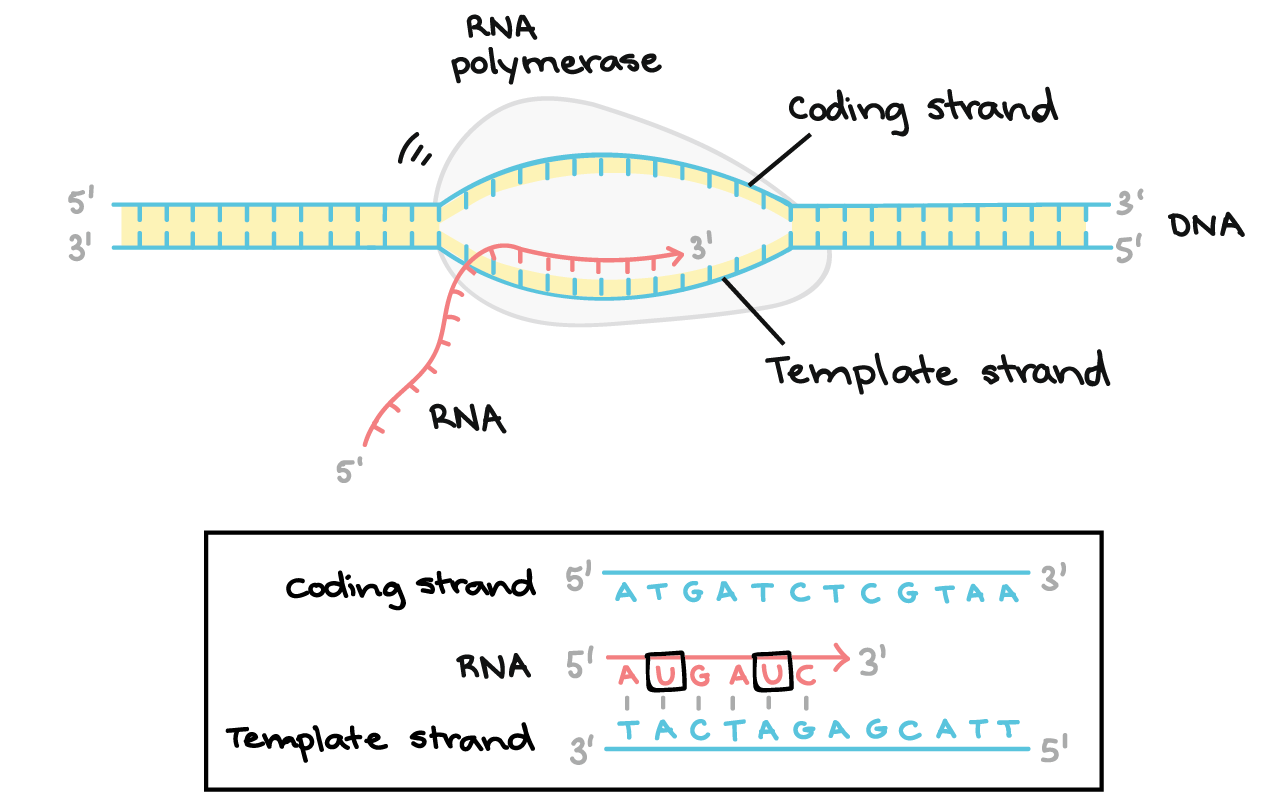

**Transcription**
The actual biological transcription process works from the template strand, doing a reverse complement (TCAG → CUGA) to give the mRNA. However, in Biopython and bioinformatics in general, we typically work directly with the coding strand because this means we can get the mRNA sequence just by switching T → U. In the following block we will perform transcription of the COVID 19 genome into mRNA

In [14]:
covid19_mRNA=covid19_DNA.transcribe()
print("DNA: " +covid19_DNA[:100])
print("RNA: " +covid19_mRNA[:100])

DNA: ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC
RNA: AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUC


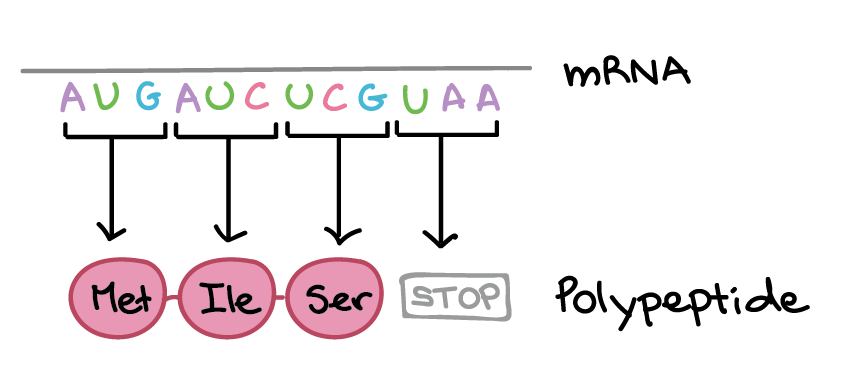
**Translation**

Translation is the process of converting the genetic information encoded in mRNA into a sequence of amino acids, which form the building blocks of proteins. This process is analogous to translating one language into another using a dictionary. In the case of translation, the "dictionary" is the genetic code, which specifies the relationship between nucleotide triplets (codons) and the corresponding amino acids.

During translation, the mRNA sequence is read in groups of three nucleotides (codons), starting from a specific start codon (AUG). Each codon is matched to its corresponding amino acid based on the genetic code. For example, the codon AUG codes for the amino acid methionine and also serves as the start codon to initiate protein synthesis.

As the mRNA is read and codons are translated, a chain of amino acids (polypeptide) is formed. This process continues until a stop codon (UAA, UAG, or UGA) is encountered, indicating the end of protein synthesis. The stop codons do not correspond to any amino acids but instead signal the termination of the polypeptide chain.

In Python, the translate() function provided by Biopython allows us to easily perform this translation process. It takes an mRNA sequence as input and returns the corresponding amino acid sequence. The resulting amino acid chain is represented as a string, with individual amino acids separated by a "*" symbol denoting the stop codon.

Overall, translation is a crucial step in gene expression, as it converts the genetic information stored in the mRNA into functional proteins, which play essential roles in various biological processes. Here we will be translating the covid 19 mRNA to protein

In [15]:
covid19_pro=covid19_DNA.translate()
print("DNA: " +covid19_DNA[:100])
print("RNA: " +covid19_pro[:100])

DNA: ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC
RNA: IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER*DGEPCPWFQREN


/opt/conda/lib/python3.10/site-packages/Bio/Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


by finding the length of the protein, we can find the count of amino acids

In [16]:
print(f"Covid-19's genome has {len(covid19_pro)} amino acids")

Covid-19's genome has 9967 amino acids


Now to segregate these amino acid chains into functional proteins

In [17]:
func_proteins = covid19_pro.split('*')#since * is the end codon
print(f"We have {len(func_proteins)} functional proteins in the covid 19 genome")

We have 775 functional proteins in the covid 19 genome


It is important to note that not all sequences of amino acids correspond to functional proteins. Only those sequences that contain more than 20 amino acids are typically considered as coding for functional proteins. Shorter sequences, known as oligopeptides, may have different functional roles in biological processes.

In our analysis, we will specifically focus on the amino acid chains that consist of more than 20 amino acids, as these are the sequences that are more likely to encode functional proteins. By excluding the shorter chains, we can concentrate on studying the proteins that play essential roles in various biological functions.

In [18]:
for i in func_proteins[:]:
    if len(i) < 20:
        func_proteins.remove(i)

after trimming:

In [19]:
print(f"We have {len(func_proteins)} functional proteins in the covid 19 genome")

We have 80 functional proteins in the covid 19 genome


storing it as a dataframe

In [20]:
func_proteins

[Seq('QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER'),
 Seq('DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS'),
 Seq('TALCVHQTFGCSNCTSWSCYG'),
 Seq('DTWCPCPSCGRNTSGLPQGSSS'),
 Seq('HLQWGMSKFCISLKFHNQDYSTKG'),
 Seq('RDRHYFGIFFCFHKCFCGNCERFGL'),
 Seq('TEINTESSLCICIRGCSCCTINFLPHS'),
 Seq('NCSKFCACFTEGRYNNTRWNFTVFTETH'),
 Seq('QSSCNGLHYRWCCSVDFAVAN'),
 Seq('IQRRNWPTHASKSPKRNYLLRGRNTSHRSVNRGSCLENW'),
 Seq('YDGNKQYLHTQRRCTNKGYFW'),
 Seq('PYTFFKSLCRYCSHKCLLSCL'),
 Seq('NASESFEKSANRQLYNHLPGSGFKWLHCRGGKDSA'),
 Seq('EARNSWNCFLEFARNACTCRRNTQINACLCGN'),
 Seq('NSCYNATWLCNTWLKFGRSCSVYEISQSASYSFCFFT'),
 Seq('PPHASCGHVNDIWTTVWSNLFGWS'),
 Seq('RNNELLVSTCQFRFLQKSLERGV'),
 Seq('TSYKISSTTGVTFCYDVSTTCSV'),
 Seq('RNFVLHRRCFTYKVLRIQRSYYGCFLQRKQLHNNHKTSYL'),
 Seq('FKNYRRGWPHRSNGCLCRQF'),
 Seq('TDKYYNLVFTIKCLPRFFNLLNRCFRCFNV'),
 Seq('WFRFFRHLSFFRNYTNYHFIF'),
 Seq('MGFNCFWLSCRVVFGIYSFH'),
 Seq('VFLCTWIGCNHAIVFQLFCSTFY'),
 Seq('NVHLLCIILLCMEKLCACCRRL'),
 Seq('RIICKISVCLLQSAYVSTYTVTRSGISV'),
 Seq('TCKECVLRQCLIYFYFSSSARVC'),

converting func_proteins into a dataframe in descending order with length

In [21]:
proteinas=pd.DataFrame(func_proteins)
proteinas['amino acid sequence'] = proteinas[0].apply(str)
proteinas['Protein length'] = proteinas[0].apply(len)
proteinas.rename(columns={0: "sequence"}, inplace=True)
pro=proteinas.drop('sequence', axis=1)
pro_= pro.sort_values(by=['Protein length'], ascending=False)

In [22]:
pro_['amino acid sequence'] = pro.iloc[:, 1:2701].apply(lambda x: ''.join(filter(lambda y: y is not None, x)), axis=1)
pro_= pro_.drop(pro.columns[0:2700], axis=1)
pro_['Protein length'] = pro_['amino acid sequence'].str.len()
pro_ = pro_.sort_values('Protein length', ascending=False)

final dataset with proteins in descending order of length

In [23]:
pro_

,amino acid sequence,Protein length
48,IVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKT...,2700
61,AQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRATA...,289
68,MKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPF...,122
62,ADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLC...,82
67,MFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSLTE...,62
...,...,...
19,NYRRGWPHRSNGCLCRQFF,19
44,NIYLCISIVGNPTGCRCRW,19
39,RCSYNCHVFGQRYCFYVCL,19
52,QICICLCLEQEENQQLCCR,19


This dataset can be used for future machine learning predictions like classification and function prediction of proteins

We next perform unsupervised machine learning for protein classification using K-means clustering. We start by preparing the data and vectorizing the amino acid sequences. Then, K-means clustering is applied to group the sequences into clusters. The cluster labels are added to the dataset, and the count of sequences in each cluster is displayed. The goal is to classify proteins based on their similarities, without predefined protein classes.Performing Unsupervised K Means clustering on the final dataset we get:

In [24]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Lambda, Layer, RepeatVector, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import backend as K
import numpy as np

# Example amino acid sequences
X = ["MTEYKLVVVGAGGVGKSALT", "GAGVGKSALTGVEVVTSTT"]

# Encoding sequences as integers
def encode_sequences(sequences):
    amino_acids = sorted(set("".join(sequences)))
    aa_to_int = {aa: i for i, aa in enumerate(amino_acids)}
    int_sequences = [[aa_to_int[aa] for aa in seq] for seq in sequences]
    return int_sequences, len(amino_acids)

# Prepare data
X_encoded, vocab_size = encode_sequences(X)
max_length = 100
X_padded = tf.keras.preprocessing.sequence.pad_sequences(X_encoded, maxlen=max_length, padding='post')
X_one_hot = tf.keras.utils.to_categorical(X_padded, num_classes=vocab_size)

# Define a Sampling Layer for the VAE
class Sampling(Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        epsilon = K.random_normal(shape=K.shape(z_mean), mean=0., stddev=1.0)
        return z_mean + K.exp(0.5 * z_log_var) * epsilon

# VAE Model Structure
latent_dim = 10

# Encoder
inputs = Input(shape=(max_length, vocab_size))  # Adjusted input shape for one-hot encoded sequences
embedding = Dense(64, activation='relu')(inputs)
encoded = LSTM(32)(embedding)
z_mean = Dense(latent_dim)(encoded)
z_log_var = Dense(latent_dim)(encoded)
z = Sampling()([z_mean, z_log_var])

# KL divergence as a custom loss
kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae = Model(inputs, z)
vae.add_loss(kl_loss)

# Decoder to match input sequence shape
decoder_inputs = RepeatVector(max_length)(z)  # Repeat latent vector max_length times
decoder_lstm = LSTM(32, return_sequences=True)(decoder_inputs)
decoder_outputs = TimeDistributed(Dense(vocab_size, activation='softmax'))(decoder_lstm)

# Final VAE Model
vae = Model(inputs, decoder_outputs)

# Compile the model with categorical cross-entropy loss
vae.compile(optimizer='adam', loss='categorical_crossentropy')
vae.summary()

# Train the VAE
vae.fit(X_one_hot, X_one_hot, epochs=100, batch_size=2, validation_split=0.2)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 10)]    0           []                               
                                                                                                  
 dense (Dense)                  (None, 100, 64)      704         ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    (None, 32)           12416       ['dense[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 10)           330         ['lstm[0][0]']                   
                                                                                            

References:

1.https://www.kaggle.com/code/amiiiney/covid-19-proteins-identification-with-biopython/notebook 

2.https://www.kaggle.com/code/mylesoneill/getting-started-with-biopython

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 100, 10)]    0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 100, 64)      704         ['input_3[0][0]']                
                                                                                                  
 lstm_4 (LSTM)                  (None, 32)           12416       ['dense_8[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 10)           330         ['lstm_4[0][0]']                 
                                                                                            

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


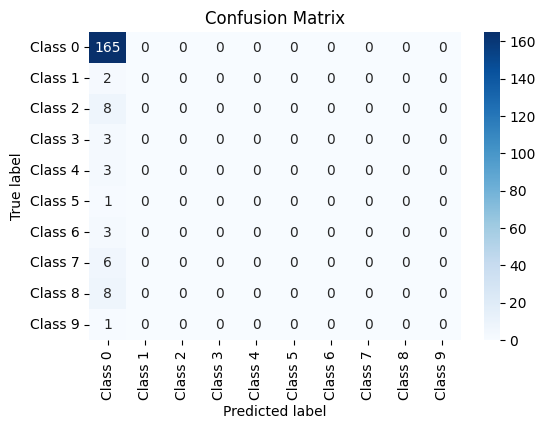

In [27]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Lambda, Layer, RepeatVector, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import backend as K
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Example amino acid sequences
X = ["MTEYKLVVVGAGGVGKSALT", "GAGVGKSALTGVEVVTSTT"]

# Encoding sequences as integers
def encode_sequences(sequences):
    amino_acids = sorted(set("".join(sequences)))
    aa_to_int = {aa: i for i, aa in enumerate(amino_acids)}
    int_sequences = [[aa_to_int[aa] for aa in seq] for seq in sequences]
    return int_sequences, len(amino_acids)

# Prepare data
X_encoded, vocab_size = encode_sequences(X)
max_length = 100
X_padded = tf.keras.preprocessing.sequence.pad_sequences(X_encoded, maxlen=max_length, padding='post')
X_one_hot = tf.keras.utils.to_categorical(X_padded, num_classes=vocab_size)

# Define a Sampling Layer for the VAE
class Sampling(Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        epsilon = K.random_normal(shape=K.shape(z_mean), mean=0., stddev=1.0)
        return z_mean + K.exp(0.5 * z_log_var) * epsilon

# VAE Model Structure
latent_dim = 10

# Encoder
inputs = Input(shape=(max_length, vocab_size))  # Adjusted input shape for one-hot encoded sequences
embedding = Dense(64, activation='relu')(inputs)
encoded = LSTM(32)(embedding)
z_mean = Dense(latent_dim)(encoded)
z_log_var = Dense(latent_dim)(encoded)
z = Sampling()([z_mean, z_log_var])

# KL divergence as a custom loss
kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae = Model(inputs, z)
vae.add_loss(kl_loss)

# Decoder to match input sequence shape
decoder_inputs = RepeatVector(max_length)(z)  # Repeat latent vector max_length times
decoder_lstm = LSTM(32, return_sequences=True)(decoder_inputs)
decoder_outputs = TimeDistributed(Dense(vocab_size, activation='softmax'))(decoder_lstm)

# Final VAE Model
vae = Model(inputs, decoder_outputs)

# Compile the model with categorical cross-entropy loss
vae.compile(optimizer='adam', loss='categorical_crossentropy')
vae.summary()

# Train the VAE
vae.fit(X_one_hot, X_one_hot, epochs=100, batch_size=2, validation_split=0.2)

# For evaluation, using the reconstruction error for prediction
# After training, you can use the model to predict the reconstructed sequences
reconstructed = vae.predict(X_one_hot)

# Flatten the reconstructed and original one-hot arrays to apply metrics
X_one_hot_flat = X_one_hot.reshape(-1, X_one_hot.shape[-1])  # Flatten for comparison
reconstructed_flat = reconstructed.reshape(-1, reconstructed.shape[-1])  # Flatten for comparison

# Convert reconstructed values to the class with the maximum probability (most probable amino acid)
y_pred = np.argmax(reconstructed_flat, axis=-1)
y_true = np.argmax(X_one_hot_flat, axis=-1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
roc_auc = roc_auc_score(y_true, reconstructed_flat, average='macro', multi_class='ovr')
conf_matrix = confusion_matrix(y_true, y_pred)

# Display the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in range(vocab_size)], yticklabels=[f'Class {i}' for i in range(vocab_size)])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/100
1/1 [==============================] - 0s 158ms/step - loss: 0.7878 - val_loss: 0.7794
Epoch 2/100
1/1 [==============================] - 0s 123ms/step - loss: 0.7719 - val_loss: 0.7779
Epoch 3/100
1/1 [==============================] - 0s 98ms/step - loss: 0.7836 - val_loss: 0.7745
Epoch 4/100
1/1 [==============================] - 0s 96ms/step - loss: 0.7715 - val_loss: 0.7771
Epoch 5/100
1/1 [==============================] - 0s 95ms/step - loss: 0.7763 - val_loss: 0.7705
Epoch 6/100
1/1 [==============================] - 0s 94ms/step - loss: 0.7663 - val_loss: 0.7617
Epoch 7/100
1/1 [==============================] - 0s 100ms/step - loss: 0.7782 - val_loss: 0.7687
Epoch 8/100
1/1 [==============================] - 0s 98ms/step - loss: 0.7703 - val_loss: 0.7801
Epoch 9/100
1/1 [==============================] - 0s 97ms/step - loss: 0.7671 - val_loss: 0.7750
Epoch 10/100
1/1 [==============================] - 0s 99ms/step - loss: 0.7844 - val_loss: 0.7688
Epoch 11/100
1/1

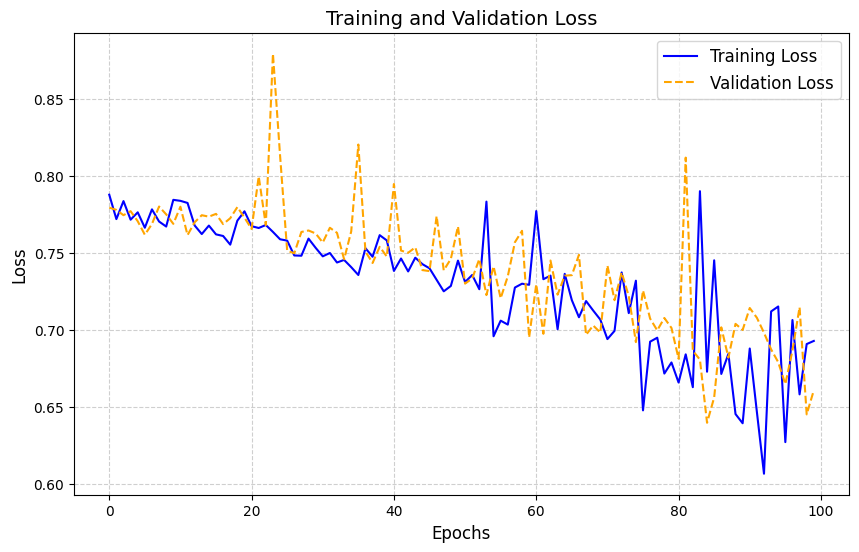

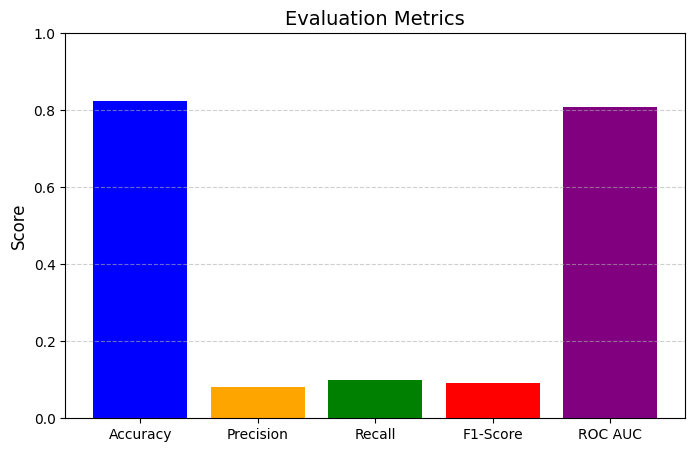

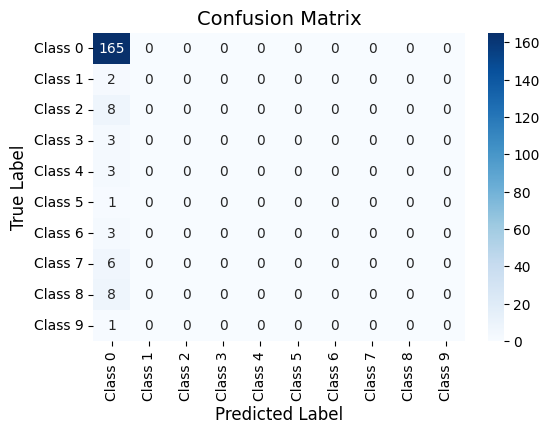

In [26]:
# Train the VAE
history = vae.fit(X_one_hot, X_one_hot, epochs=100, batch_size=2, validation_split=0.2, verbose=1)

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='-')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Evaluate and Plot Metrics
# Accuracy, Precision, Recall, F1-Score, and Confusion Matrix are already calculated above
# Create a bar chart for metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1, 'ROC AUC': roc_auc}

plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Evaluation Metrics', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1.0)  # Metrics are normalized between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Visualize Confusion Matrix (already included)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Class {i}' for i in range(vocab_size)],
            yticklabels=[f'Class {i}' for i in range(vocab_size)])
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()
